<a href="https://colab.research.google.com/github/octagomez/TP_MARZO2022_REGRESION_LOGISTICA/blob/main/Matrices_200_Ejercicio_TP_MARZO_NARCI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 1.5 MB/s 


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import category_encoders as ce


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MATRIZ 20x3

In [4]:
# CREO UN VECTOR DE DISTRIBUCION NORMAL 20
da = np.random.normal(loc=0, scale=1, size=100).reshape(100,1)
da2 = np.random.normal(loc=10, scale=15, size=100).reshape(100,1)
da = np.append(da, da2 , axis=0)
da
# CREO UN VECTOR DE DISTRIBUCION UNIFORME
rd = np.random.uniform(low=0, high=1.5, size=100).reshape(100,1)
rd2 = np.random.uniform(low=1.6, high=3, size=100).reshape(100,1)
rd = np.append(rd, rd2 , axis=0)
# CREO UN VECTOR DE DISTRIBUCION SESGADA
rs =np.random.lognormal(2,3,100).reshape(100,1)
rs2 =np.random.lognormal(0,3,100).reshape(100,1)
rs = np.append(rs, rs2 , axis=0)

In [5]:
# INCORPORO LOS DATOS A UNA MATRIZ
# https://www.delftstack.com/es/howto/numpy/numpy-add-column/#:~:text=append()-,La%20funci%C3%B3n%20numpy.,valores%20a%20el%20array%20preexistente.
XU = np.append(da, rd , axis=1)
# VEO LA MATRIZ
#print("VECTOR NORMAL", da)
#print("VECTOR UNIFORME",rd)
#print("MATRIZ_1", XU)
# INCORPORP LA TERCERA COLUMNA A LA MATRIZ
XU_s = np.append(XU, rs , axis=1)
#print("MATRIZ_2", XU)
XU.shape

print("DISTRIBUCION NORMAL \nMEDIA: ", da.mean(), " // VARIANZA :", da.var()  )

DISTRIBUCION NORMAL 
MEDIA:  5.925106450376176  // VARIANZA : 167.16893046385746


## DEFINO EL VECTOR Y

In [6]:
# XU_s_t = XU_s.transpose()
# XU_s_t.shape
# y_test_t = pd.DataFrame(XU_s_t)
# y_test_DNORMAL = pd.DataFrame(XU_s ,columns=[0])
# print(XU_x)
print(XU_s)

[[-7.54426953e-03  5.20565910e-01  7.31138993e+03]
 [-7.23100759e-01  6.94705113e-01  1.34261872e+00]
 [ 1.08894003e+00  1.08014220e+00  1.53204165e-01]
 [-8.82401958e-01  4.15448252e-02  2.46803575e-02]
 [-6.30850066e-01  1.37551038e-01  1.71546783e+01]
 [-7.49501071e-01  7.00440323e-01  6.68927315e+00]
 [-2.93448536e-01  1.19716957e+00  3.74505272e+01]
 [-9.07646287e-01  1.43581735e+00  1.02041599e+00]
 [-1.13949108e+00  1.02582889e+00  1.84846946e+02]
 [-1.56508011e+00  1.49356280e+00  7.04329348e+01]
 [ 4.10661003e-01  6.23016072e-01  1.29867746e+02]
 [ 5.65763461e-01  1.39962863e+00  1.32663671e+03]
 [ 1.12874310e+00  6.12355028e-01  3.60673624e+00]
 [-8.76313366e-01  1.10724217e+00  3.63018823e+00]
 [-4.61892846e-01  3.06906176e-01  7.63083897e+00]
 [-6.93458507e-01  1.15181040e+00  1.55524164e-01]
 [-6.57481245e-01  1.61083845e-01  1.99049613e+02]
 [ 2.12418588e-01  4.12038675e-01  1.30302479e+03]
 [-1.49050941e+00  7.97559926e-01  2.58224023e-02]
 [ 1.83298633e-01  1.18113451e+

In [7]:
y_20 =np.array([0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1,
                1,1,1,1,1,1,1,1,1,1
                ])

In [9]:
print(da.shape)
print(y_20.shape)

(200, 1)
(200,)


In [8]:
# Asi veremos información estadística básica de nuestro set de datos. La Media, el desvío estándar, 
# valores mínimo y máximo de cada característica:
# VAMOS A CONVERTIR LA MATRIZ DE NP a UN DF 
df = pd.DataFrame(XU_s)
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,5.925106,1.515057,227.776921
std,12.961828,0.871839,991.195730
min,-20.913418,0.035212,0.000696
25%,-0.574626,0.730589,0.274824
50%,0.893266,1.546844,3.041631
75%,11.148572,2.267119,28.861153
max,56.470207,2.998589,10528.265959


Text(0, 0.5, 'Dist. Sesgada')

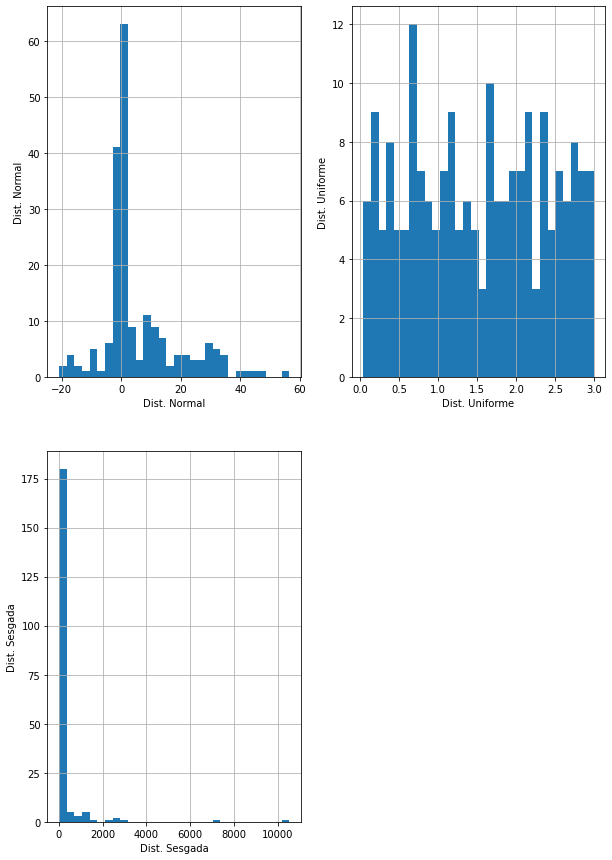

In [10]:
# Dibujamos los histogramas para checkear la distribución de las variables usando el dataframe df20:
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)
fig =df[0].hist(bins=30)
fig.set_xlabel('Dist. Normal')
fig.set_ylabel('Dist. Normal')

plt.subplot(2,2,2)
fig =df[1].hist(bins=30)
fig.set_xlabel('Dist. Uniforme')
fig.set_ylabel('Dist. Uniforme')

plt.subplot(2,2,3)
fig =df[2].hist(bins=30)
fig.set_xlabel('Dist. Sesgada')
fig.set_ylabel('Dist. Sesgada')


In [11]:
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(XU_s,y_20,test_size=0.2)


In [12]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0) # OBTENGO Model accuracy score: 0.9500 Confusion matrix
                                                                                                          # [[10  0]
                                                                                                          # [ 1  9]]
#logreg = LogisticRegression(solver='newton-cg', random_state=0) # Model accuracy score: 1.0000 Confusion matrix
                                                                                                # [[10  0]
                                                                                                # [ 0 10]]
#logreg = LogisticRegression(solver='sag', random_state=0) # Model accuracy score: 0.9500 Confusion matrix
                                                                                          # [[ 9  1]
                                                                                          # [ 0 10]]
#logreg = LogisticRegression(solver='saga', random_state=0) # Model accuracy score: 0.9000 Confusion matrix
                                                                                          # [[9 1]
                                                                                          # [1 9]]
#logreg = LogisticRegression(solver='lbfgs',random_state=0) # Model accuracy score: 1.0000 Confusion matrix
                                                                                          # [[10  0]
                                                                                          # [ 0 10]]

# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [13]:
# ESTA ES LA PREDICCION
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [14]:
# CALCULO LA PRESICION DEL ALGORITMO DE PREDICCION COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 1.0000


In [ ]:
# Creamos nuestra Matriz de Confusión:
# COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

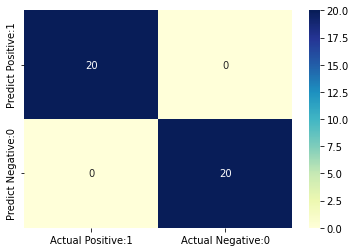

In [16]:
# Visualizamos la Matriz de Confusión:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [17]:
# El Informe de Clasificación es otra forma de evaluar el rendimiento del modelo de clasificación.
# Muestra las puntuaciones de precisión, recuperación, f1 y soporte para el modelo:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [18]:
# aqui se observa que variable tiene mayor influencia
logreg.coef_

array([[ 5.39961607e-02,  2.81074134e+00, -7.88160007e-04]])

## SUPUESTOS DE LA REGRESION LOGISTICA

# SUPUESTO 1 - Tipo de resultado apropiado
REGRESION LOGISTICA: la variable de respuesta es binaria [0,1]



In [19]:
# EVALUO LA SALIDA (OUTPUT) DEBE TENER  2 VALORES
# la funcion unique de la libreria numpy nos permite leer un array de numpy y su salida son valores unicos
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
print(np.unique(y_20))

[0 1]


In [20]:
# EVALUO LA CANTIDAD DE VALORES QUE HAY PARA CADA UNO
df_y = pd.DataFrame(y_20)
df_y.groupby([0]).size()

0
0    100
1    100
dtype: int64

## SUPUESTO 2 - Linealidad de variables independientes y probabilidades logarítmicas

REGRESION LOGISTICA: Existe una relación lineal entre las variables explicativas y el logit de la variable de respuesta

# Prueba de caja-Tidwell

Uno de los supuestos importantes de la regresión logística es la linealidad del logit sobre las covariables continuas. Esta suposición significa que las relaciones entre los predictores continuos y el logit (logaritmo de probabilidades) son lineales.
* La transformación de Box-Tidwell (prueba) se puede utilizar para probar la 
linealidad en el supuesto logit cuando se realiza una regresión logística.
* **Comprueba si la transformada logit es una función lineal del predictor, agregando efectivamente la transformada no lineal del predictor original como un término de interacción para probar si esta adición no mejoró la predicción.** 
* Un valor **p estadísticamente significativo** del término de interacción en la transformación de Box-Tidwell **significa que se viola la suposición de linealidad**
* **Si se encuentra que una variable no es lineal**, podemos resolverla incorporando términos polinómicos de orden superior para esa variable en el análisis de regresión para capturar la no linealidad (por ejemplo, x^2). **Otra solución a este problema es la categorización de las variables independientes. Eso es transformar variables métricas a nivel ordinal y luego incluirlas en el modelo.**

## SUPUESTO 3 - No hay valores atípicos fuertemente influyentes
* Los valores influyentes son puntos de datos individuales extremos que pueden alterar la calidad del modelo de regresión logística.
* La distancia de Cook es una estimación de la influencia de un punto de datos. Tiene en cuenta tanto el apalancamiento como el residual de cada observación. * La distancia de Cook es un resumen de cuánto cambia un modelo de regresión cuando se elimina la i -ésima observación.
* Una regla general es que cualquier observación con una distancia de Cook superior a 4/n (donde n = observaciones totales) se considera influyente ( https://www.statology.org/cooks-distance-python/ y https: //www.scikit-yb.org/en/latest/api/regressor/influence.html?highlight=cook#module-yellowbrick.regressor.influence ), aunque hay valores de corte aún más genéricos de >0.5-1.0.
* Para valores atípicos, podemos usar los residuos estandarizados absolutos para identificarlos (std resid > 3)
Referencia: https://www.statsmodels.org/dev/examples/notebooks/generated/influence_glm_logit.html

In [21]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
# Use GLM method for logreg here so that we can retrieve the influence measures
# USO LAS MATRICES DE POBLACION
logit_model = GLM(y_20, XU_s, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.27
Date:                Wed, 13 Apr 2022   Deviance:                       200.54
Time:                        17:35:46   Pearson chi2:                     264.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0568      0.020      2.828      0.0

In [23]:
# Use GLM method for logreg here so that we can retrieve the influence measures
# USO LAS MATRICES DE POBLACION
# logit_model = GLM(y_train, X_train, family=families.Binomial())
# logit_results = logit_model.fit()
# print(logit_results.summary())

In [ ]:
# Use GLM method for logreg here so that we can retrieve the influence measures
# USO LAS MATRICES DE POBLACION
# logit_model = GLM(y_train, X_train, family=families.Binomial())
# logit_results = logit_model.fit()
# print(logit_results.summary())

In [24]:
from scipy import stats
# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,7.823770e-13,0.224869
1,8.657494e-04,0.832654
2,2.298890e-03,1.015075
3,3.068296e-05,0.655351
4,4.721934e-05,0.669238
...,...,...
195,2.034917e-04,0.404977
196,1.723450e-02,0.978889
197,8.359217e-03,0.847453
198,8.925918e-03,0.856785


In [25]:
# Set Cook's distance threshold
cook_threshold = 4 / len(XU_s)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.02


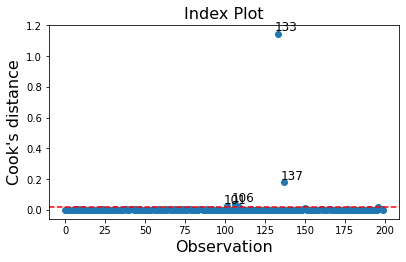

In [26]:
# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [27]:
# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(XU_s)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 2.0%


In [28]:
# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(XU_s)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')

Proportion of highly influential outliers = 0.5%


In [29]:
# Display top 5 most influential outliers
extreme.sort_values("cooks_d", ascending=False).head()
extreme

,cooks_d,std_resid
133,1.147087,9.816247


In [32]:
# Deep dive into index 297 (extreme outlier)
# lo paso de numpy a pandas
df_x = pd.DataFrame(XU_s)
# corro el balance
df_x.iloc[109]  # 0 = Did not survive


0   -16.798897
1     1.860059
2     0.189975
Name: 109, dtype: float64

In [ ]:
df_y = pd.DataFrame(y_20)
df_y.iloc[109]  # 0 = Did not survive

0    1
Name: 109, dtype: int64

* Es importante tener en cuenta que para los puntos de datos con distancias de Cook relativamente altas, no significa automáticamente que deba eliminarse inmediatamente del conjunto de datos. Es esencialmente un indicador para resaltar qué puntos de datos vale la pena analizar más a fondo, para comprender si son anomalías reales o no.
* En la práctica, una evaluación de valores "grandes" es un juicio basado en la experiencia y el conjunto particular de datos que se analiza.
* Además, según nuestro umbral predefinido (4/N), solo el 5 % (51/891) de los puntos se encuentran en la zona de valores atípicos, que también es pequeña. El problema surge cuando hay una cantidad significativa de puntos de datos clasificados como valores atípicos.
* La gestión de valores atípicos está fuera del alcance de esta demostración.

## Supuesto 4 - Ausencia de multicolinealidad


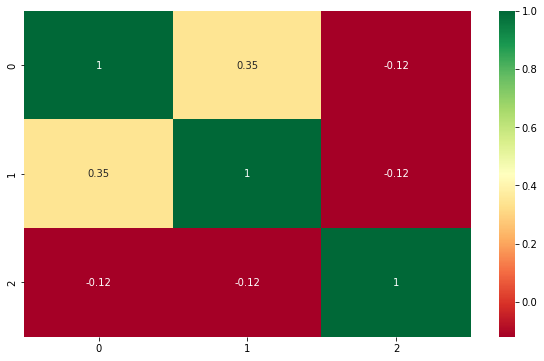

In [33]:
# CREO LA MATRIZ DE CORRELACION
# uso la matriz XU_s convertida en DF de pandas
# df_x = pd.DataFrame(XU_s)

corrMatrix = df_x.corr()
plt.subplots(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

* La matriz de correlación puede ser difícil de interpretar cuando hay muchas variables independientes
* Además, no todos los problemas de colinealidad pueden detectarse mediante la inspección de la matriz de correlación: es posible que exista colinealidad entre tres o más variables incluso si ningún par de variables tiene una correlación particularmente alta.
* Como tal, usamos el factor de inflación de varianza (VIF) en su lugar

#### Factor de inflación de varianza (VIF)
* Incluir constante en el cálculo de VIF. Referencia: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [38]:
# Use variance inflation factor to identify any significant multi-collinearity

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

# CREA CONSTANTE
X_constant = sm.add_constant(XU_s, prepend=False)
# CONVIERTO A UN DF
X_constant = pd.DataFrame(X_constant)
calc_vif(X_constant) # Include constant in VIF calculation in Python

,variables,VIF
0,0,1.145421
1,1,1.145541
2,2,1.021761
3,3,4.245463


* El umbral para VIF suele ser 5 (es decir, los valores superiores a 5 significan que hay presencia de multicolinealidad)
* Como todas las variables tienen VIF <5, significa que no hay multicolinealidad, y se cumple este supuesto
* Echemos un vistazo a la situación en la que no soltamos la primera variable al obtener maniquíes: